In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [259]:
invoice = pd.read_csv("/Users/joiecataquis/Downloads/fct_invoice.csv")
customers = pd.read_json("/Users/joiecataquis/Downloads/dim_customer.json")

In [134]:
invoice.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [135]:
customers.columns

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')

EASY 1
- How many unique customers are in the dataset?

In [111]:
unique = customers.id.nunique()

print(f"There are {unique} unique customers.")

There are 5191 unique customers.


EASY 2
- What are the different categories of products available? How many unique categories are there?

In [183]:
categories = list(invoice.category.unique())
print(f"The categories of products available are: ")
print(categories)
unique_cat = invoice.category.nunique()
print(f"\nThere are {unique_cat} unique categories.")

The categories of products available are: 
['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']

There are 8 unique categories.


EASY 3
- Which payment method is the most popular? How many times was it used?

In [123]:
payment_method = invoice.groupby("payment_method")['payment_method'].count()
pop_payment = payment_method.idxmax()
print(f"The most popular payment method is: {pop_payment}")

freq = invoice.payment_method.value_counts()['Cash']
print(f"This payment method was used {freq} times.")

The most popular payment method is: Cash
This payment method was used 44447 times.


MEDIUM 1
- What are the three most popular categories, by total sales?

In [175]:
invoice['sales'] = invoice['quantity'] * invoice['price'] 
category_sales = invoice.groupby('category')['sales'].sum().nlargest(3)

top_categories = list(category_sales.index)
top_category_sales = list(category_sales)

print(f"The top 3 most popular categories by total sales are {top_categories}.")
print(f"Their total sales respectively are {top_category_sales}.")

The top 3 most popular categories by total sales are ['Clothing', 'Shoes', 'Technology'].
Their total sales respectively are [113996791.03999999, 66553451.47, 57862350.0].


MEDIUM 2
- What are the total sales attributed to customers over the age of 45?

In [271]:
merged_data = pd.merge(customers, invoice, left_on='id', right_on='customer_id')

qty = merged_data['quantity']
price = merged_data['price'] 

merged_data['total_sales'] = qty * price
over_age = merged_data.loc[merged_data['age'] > 45]

total_sales = over_age['total_sales'].sum()
print(f"The total sales from customers over the age of 45 is {total_sales}")

The total sales from customers over the age of 45 is 82039768.14999999


MEDIUM 3
- How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

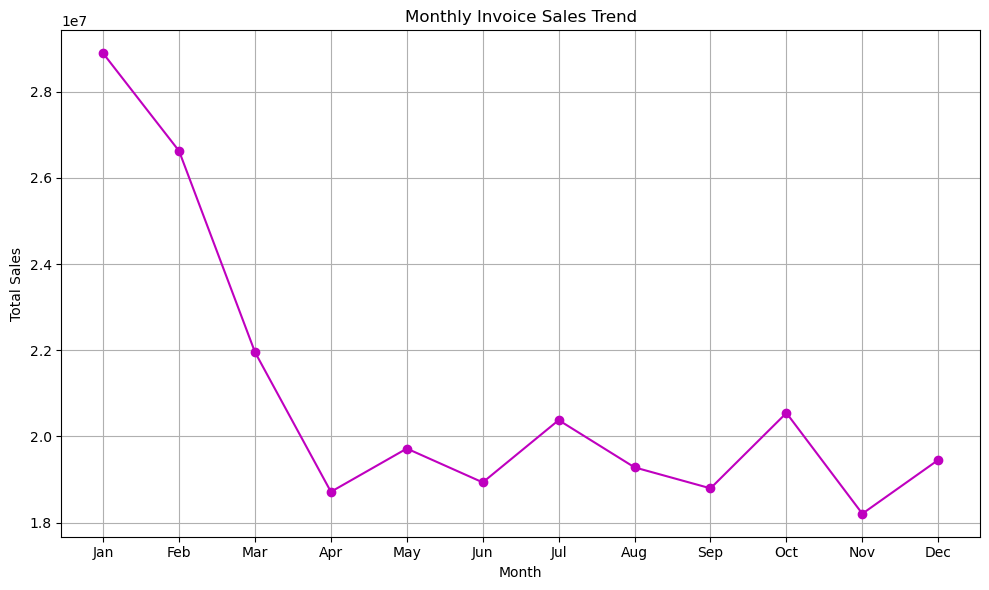

The graph above shows the trend per month, no matter the year, for total sales from the invoices.


In [226]:
invoice['invoice_date'] = pd.to_datetime(invoice['invoice_date'], format='%d/%m/%Y')
invoice['sales'] = invoice['quantity'] * invoice['price']
invoice['month'] = invoice['invoice_date'].dt.month
monthly_sales = invoice.groupby('month')['sales'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-', color='m')
plt.title('Monthly Invoice Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

print(f"The graph above shows the trend per month, no matter the year, for total sales from the invoices.")

HARD
- Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [270]:
merged_data = pd.merge(customers, invoice, left_on='id', right_on='customer_id')

qty = merged_data['quantity']
price = merged_data['price'] 
merged_data['total_sales'] = qty * price

merged_data['age'] = pd.to_numeric(merged_data['age'], errors='coerce')
merged_data['age'].fillna(-1, inplace=True)

bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, float('inf')]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

merged_data['age'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

pivot_table = pd.pivot_table(merged_data, index=['category'], columns='age', values='total_sales', aggfunc='sum')
print(pivot_table)

age                   10-19       20-29        30-39        40-49       50-59  \
category                                                                        
Books               7923.45    76022.70     87157.95     87885.15    72735.15   
Clothing         1144505.12  9959955.28  11540776.72  11447451.84  9943150.80   
Cosmetics          65991.18   583796.28    731310.76    682396.78   563954.20   
Food & Beverage     9434.92    68633.29     87911.07     91922.48    72132.16   
Shoes             634379.69  5571978.28   7303468.73   7163028.95  5778436.76   
Souvenir            6181.71    54438.93     63834.66     68444.55    54966.78   
Technology        739200.00  5053650.00   6298950.00   6082650.00  4458300.00   
Toys               35911.68   366392.32    424704.00    408253.44   330516.48   

age                    60-69       70-79       80-89  90-99  100+  
category                                                           
Books               81885.75    57706.35    29224.35 